In [7]:
import numpy as np
from subprocess import getoutput
import requests
import sys
import ssl
import pandas as pd
from OpenSSL import crypto
import matplotlib.pyplot as plt
import pandas as pd
import os
from Crypto.PublicKey import RSA
from tqdm import tqdm

In [8]:
filename = 'entropy.txt'
data = open(filename).read().splitlines()


In [9]:
data = np.array(data).astype(np.int32)
x = np.arange(len(data))/2
print(data)

[3811 3811 3812 ... 3254 3260 3266]


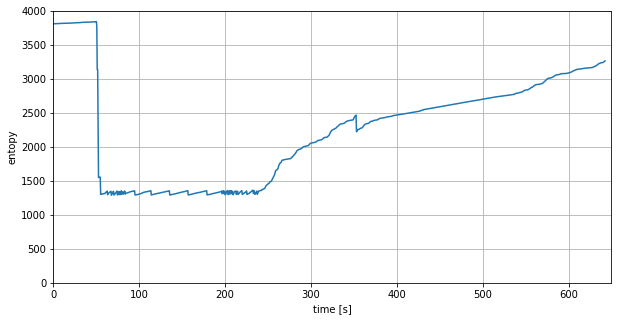

In [10]:
plt.figure(figsize=(10,5))
plt.plot(x,data)
plt.xlabel('time [s]')
plt.ylabel("entopy")
#plt.title('Wykres entropii w czasie przy generacji klucza GPG \n na sytemie Linux Mint 18')
plt.xlim(0,650)
plt.ylim(0,4000)
plt.grid()
plt.savefig('entriopia_NT.png')
plt.show()


# Scrapping data from webistes

## pobranie kluczy + czyszczenie dataframea

In [18]:
if(False):
    keys_paths = os.listdir('keys')
    keys_paths = ['keys/'+p for p in keys_paths]
    
    pd_keys = [pd.read_csv(p, index_col = 0) for p in keys_paths]
    pd_key = pd_keys[0]
    for p in pd_keys[1:]:
        pd_key = pd_key.append(p)
    
    del pd_key['Rank']
    
    pd_key = pd_key.reset_index()
    
    del pd_key['index']
    
    pd_key.loc[pd_key['Key'].notnull()]
    
    pd_key.to_csv('domeny_klucze.csv')
else:
    pd_key = pd.read_csv('domeny_klucze.csv')

## Dict = klucz : lista domen

In [19]:
if(False):
    key_page = {}
    
    for i, p in pd_key.iterrows():
        key_decode = p['Key']
        hostname = p['Domain']
        if key_decode in key_page:
            key_page[key_decode] = key_page[key_decode] + [hostname]
        else:
            key_page[key_decode] = [hostname,]
            
    del key_page[np.nan]

## Lista - klucz, liczba domen

In [27]:
if(False):
    list_keys = []
    
    for i, k in key_page.items():
        list_keys.append([i, len(k)])
        
    pd_no_keys = pd.DataFrame.from_records(list_keys)
    
    pd_no_keys.to_csv('key_count.csv')
else:
    pd_no_keys = pd.read_csv('key_count.csv', index_col = 0)

In [30]:
pd_no_keys

,0,1
0,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,139
1,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,4
2,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
3,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
4,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,7
...,...,...
74177,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
74178,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
74179,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
74180,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1


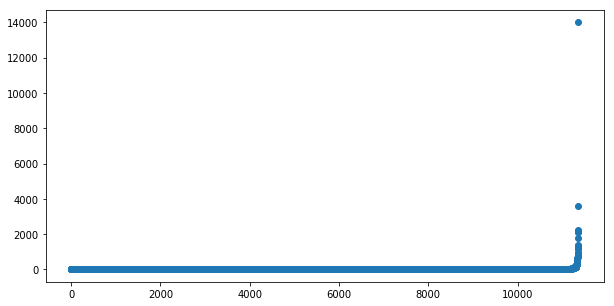

In [31]:
if False:
    keys_list = pd_no_keys.loc[:,1].values.tolist()
    
    keys_list.sort()
    keys_list = np.array(keys_list)
    
    plt.figure(figsize=(10,5))
    plt.plot(keys_list[keys_list>1], 'o')

### Ratio

In [35]:
print('domens:', np.sum(pd_no_keys[1].values))
print('share key:', np.sum(pd_no_keys[1].values[pd_no_keys[1].values > 1]))
print('ratio:', np.sum(pd_no_keys[1].values[pd_no_keys[1].values > 1])/np.sum(pd_no_keys[1].values))

domens: 167421
share key: 104600
ratio: 0.624772280657743


In [36]:
pd_no_keys.loc[pd_no_keys.loc[:,1] > 2,:].sort_values(by=[1],ascending=False)

,0,1
304,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,13997
26,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,3608
7,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,2255
22,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,2155
27,b'-----BEGIN PUBLIC KEY-----\nMFkwEwYHKoZIzj0C...,2129
...,...,...
17325,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,3
17324,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,3
17292,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,3
3657,b'-----BEGIN PUBLIC KEY-----\nMIICIjANBgkqhkiG...,3


## Duplikaty

In [ ]:
= os.path.commonprefix(['apple pie available', 'apple pies'])

### Key to number
#### wybierz klucz z ramki danych

In [39]:
key_str = pd_no_keys.loc[pd_no_keys.loc[:,1] > 1,:].sort_values(by=[1],ascending=False).iloc[0,0]

#### oczyść z \\\n oraz początku i końca

In [48]:
key_clean = key_str[30:-29].replace('\\n', '')
key_clean

'MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAzWJP5cMThJgMBeTvRKKl7N6ZcZAbKDVAtNBNnRhIgSitXxCzKtt9rp2RHkLn76oZjdNO25EPp+QgMiWU/rkkB00Y18Oahw5fi8s+K9dRv6i+gSOiv2jlIeW/S0hOswUUDH0JXFkEPKILzpl5ML7wdp5kt93vHxa7HswOtAxEz2WtxMdezm/3CgO3sls20wl3W03iI+kCt7HyvhGy2aRPLhJfeABpQr0Uku3q6mtomy2cgFawekN/X/aH8KknX799MPcuWutM2q88mtUEBsuZmy2nsjK9J7/yhhCRDzOV/yY8c5+l/u/rWuwwkZ2lgzGp4xBBfhXdr6+m9kmwWCUm9QIDAQAB'

#### zamień na liczbę

In [49]:
key_int = int.from_bytes(key_clean.encode(), 'little')
key_int

27736142053001972894141168940794628257122595916689500327337814341233702579571191726171192003997939169360692208972473464481406697865724011100281443278195278731581691888597354870140246748527444181992252960189151142429554895594863583933923480159126397675192644829119313833703381348968107358436189284486758101278432697304788189716200964589051457558010627706789891951021560856034917805031622495121390702751622947874597999855708672897851711176185905178728389036613779517873556148898466029667317655253909482911745643898582334852578745527682659988105625551105956650520112190774383411319292036989510245130812474077825149865366508826306186444989755628705474943049498460670576842747728621377488734773120353865848580006325434517215958345375320127948921509092572086071871468998600692328490902561812395023297361667096083466166049262940079979675425955889450823899265465043743768226651703902405844287893956335783700461288503339388260968956568468069414657935693